In [631]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [632]:
df=pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [633]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [634]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [635]:
df=df.drop('_c39',axis=1)

In [636]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


## Data Preprocessing

#### Cleaning Data

In [652]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [653]:
#Making a Duplicate Dataframe for data cleaning.
df1=df.copy()

In [654]:
df1.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,NaN,2006-01-01,OH,250/500,NaN,NaN,NaN,NaN,...,NaN,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,753
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN


In [655]:
#Separating N and D in N/D formats of policy_csl
df1['csl_person'] = df.policy_csl.str.split('/',expand=True)[0]
df1['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]
df1.drop('policy_csl',axis=1,inplace=True)

In [656]:
df1['csl_person'].head()

0    250
1    250
2    100
3    250
4    500
Name: csl_person, dtype: object

In [657]:
#df1['incident_period_of_day']
df1['incident_date']


0      2015-01-25
1      2015-01-21
2      2015-02-22
3      2015-01-10
4      2015-02-17
          ...    
995    2015-02-22
996    2015-01-24
997    2015-01-23
998    2015-02-26
999    2015-02-26
Name: incident_date, Length: 1000, dtype: object

In [658]:
#df1[["day", "month", "year"]] = df1["date"].str.split("-", expand = True) #expand=True for getting Dataframe instead of Dataseries.
df1['Acc_year']=df.incident_date.str.split('-',expand=True)[0]
df1['Acc_month']=df.incident_date.str.split('-',expand=True)[1]
df1['Acc_Day']=df.incident_date.str.split('-',expand=True)[2]
df1.drop('incident_date',axis=1,inplace=True)

In [659]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [660]:
#Now looking on Incident Hour and converting it into categorical variable like 6 to 9 in early morning.
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  #Factorize according to the time period of the day.
#Take -1 instead of 0 else NaN would be encounter.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df1['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype('object')
df1[['incident_hour_of_the_day', 'incident_period_of_day']].head(10)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [661]:
df1.drop('incident_hour_of_the_day',axis=1,inplace=True)

In [662]:
#Now last feature left to be converted is auto_year. We can bring down the values of year by replacing it with their age.
df1['vehicle_age'] = 2021 - df1['auto_year'] 
df1['vehicle_age'].head(10)
df1.drop('auto_year',axis=1,inplace=True)


In [663]:
#Checking Categorical Variable
df1.select_dtypes(object).columns

Index(['policy_bind_date', 'policy_state', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported',
       'csl_person', 'csl_per_accident', 'Acc_year', 'Acc_month', 'Acc_Day',
       'incident_period_of_day'],
      dtype='object')

In [664]:
#Dropping rest not required Features.
df1 = df1.drop(columns =['policy_number','insured_zip','policy_bind_date','incident_location'])

In [665]:
#Identifying ? in all features for confirmation as we saw it in 'police_report_available' feature.
detector={}
for i in df.columns:
    if(df[i].dtype=='object'):
        j=np.sum(df[i]=='?')
        detector[i]=j
detector= pd.DataFrame.from_dict(detector,orient='index')
print(detector) 

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


In [666]:
#df1['collision_type'].value_counts()

In [667]:
df1= pd.get_dummies(df1,columns=['policy_state','insured_sex','insured_education_level','insured_occupation','insured_hobbies', 'insured_relationship','incident_type','incident_severity','incident_severity','authorities_contacted','incident_state','incident_city','auto_make','auto_model','csl_person','csl_per_accident','incident_period_of_day'])
                                 

In [668]:
df1.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,collision_type,number_of_vehicles_involved,property_damage,...,csl_per_accident_1000,csl_per_accident_300,csl_per_accident_500,incident_period_of_day_afternoon,incident_period_of_day_early_morning,incident_period_of_day_evening,incident_period_of_day_fore-noon,incident_period_of_day_morning,incident_period_of_day_night,incident_period_of_day_past_midnight
0,328,48,1000,1406.91,0,53300,0,Side Collision,1,YES,...,0,0,1,0,1,0,0,0,0,0
1,228,42,2000,1197.22,5000000,0,0,?,1,?,...,0,0,1,0,0,0,0,1,0,0
2,134,29,2000,1413.14,5000000,35100,0,Rear Collision,3,NO,...,0,1,0,0,0,0,0,1,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,Front Collision,1,?,...,0,0,1,0,1,0,0,0,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,?,1,NO,...,1,0,0,0,0,1,0,0,0,0


In [669]:
df1.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'collision_type', 'number_of_vehicles_involved',
       'property_damage',
       ...
       'csl_per_accident_1000', 'csl_per_accident_300', 'csl_per_accident_500',
       'incident_period_of_day_afternoon',
       'incident_period_of_day_early_morning',
       'incident_period_of_day_evening', 'incident_period_of_day_fore-noon',
       'incident_period_of_day_morning', 'incident_period_of_day_night',
       'incident_period_of_day_past_midnight'],
      dtype='object', length=171)

In [670]:
df1['collision_type'].value_counts()


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [671]:
#Label Encoding of Target and collision_type.
Label_Enc= LabelEncoder()
df1['collision_type']=Label_Enc.fit_transform(df1['collision_type'])
df1['fraud_reported']=Label_Enc.fit_transform(df1['fraud_reported'])

In [672]:
df1['collision_type'].head(10)

0    3
1    0
2    2
3    1
4    0
5    2
6    1
7    1
8    1
9    2
Name: collision_type, dtype: int32

<AxesSubplot:xlabel='property_damage', ylabel='count'>

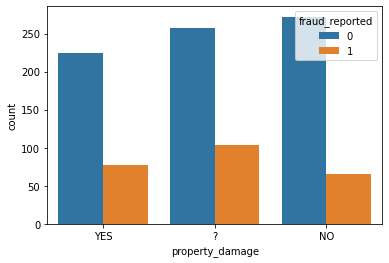

In [673]:
df1['property_damage'].value_counts()
sns.countplot(df1['property_damage'],hue=df1['fraud_reported'])
#Considering ? same as No

In [674]:
#Filling ? and No with 0 police_report_available and property_damage
#for i in range(0,1000):
#    if (df1['property_damage'][i]=='?' or df1['property_damage'][i]=='No'):
#        df1['property_damage'][i]=0
#    else:
#        df1['property_damage'][i]=1
#    i+=1

In [675]:
#df1['property_damage'].replace(to_replace='?',value=0,inplace=True)
#df1['property_damage'].replace(to_replace='NO',value=0,inplace=True)
#df1['property_damage'].replace(to_replace='YES',value=1,inplace=True)
#df1['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
#df1['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
#df1['police_report_available'].replace(to_replace='?', value=0, inplace=True)
df1['property_damage']= Label_Enc.fit_transform(df1['property_damage'])
df1['police_report_available']=Label_Enc.fit_transform(df1['police_report_available'])

In [676]:
df1['property_damage']

0      2
1      0
2      1
3      0
4      1
      ..
995    2
996    2
997    0
998    0
999    0
Name: property_damage, Length: 1000, dtype: int32

### Scaling the features and detecting the outlier


In [677]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

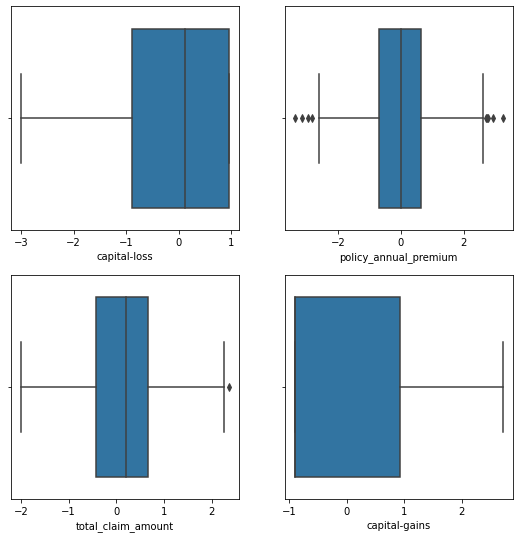

In [678]:
#Checking Outlier
columns={'policy_annual_premium','capital-gains','capital-loss','total_claim_amount'}
plt.figure(figsize=(9,14))
i=1
for c in columns:
    plt.subplot(3,2,i)
    i+=1
    sns.boxplot(X_scaled[c])

322.4649999999999


<AxesSubplot:xlabel='policy_annual_premium'>

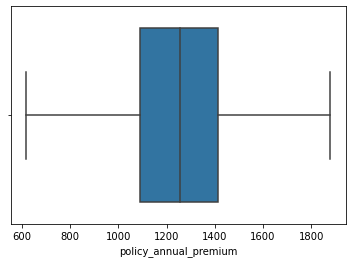

In [679]:
q1,q3=np.percentile(X['policy_annual_premium'],[25,75])
iqr=q3-q1
print(iqr)
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5* iqr)
df1= df1[df1['policy_annual_premium']>lower_fence]
df1= df1[df1['policy_annual_premium']<higher_fence]
sns.boxplot(df1['policy_annual_premium'])

In [722]:
df1 = df1.loc[:,~df1.columns.duplicated()]
#During XGB training duplicate features were encountered so dropping all such duplicate features and rectifying the mistake.

In [723]:

X= df1.drop('fraud_reported',axis=1)
y= df1['fraud_reported']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

SS=StandardScaler()
X_scaled_train=SS.fit_transform(X_train)
X_scaled_test= SS.transform(X_test)
X_scaled_train= pd.DataFrame(X_scaled_train,columns= X_train.columns)
X_scaled_test= pd.DataFrame(X_scaled_test,columns= X_test.columns)
y_train=pd.DataFrame(y_train)

## Trying out different Models

In [729]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

adb = AdaBoostClassifier()
xgb = XGBClassifier()
logreg= LogisticRegressionCV()
dt = DecisionTreeClassifier(max_depth=5)
lda = LinearDiscriminantAnalysis()
QDA=QuadraticDiscriminantAnalysis()
gnb = GaussianNB()
knn = KNeighborsClassifier(5)
svcl = SVC()
rf=RandomForestClassifier()

In [733]:
seed=7

models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', cv=10)))
models.append(('XGB', XGBClassifier(solver = 'lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=200)))
models.append(('ADA', AdaBoostClassifier(n_estimators=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))


In [734]:
results=[]
name=[]
scoring='accuracy'
for mod_name,model in models:
    kfold= KFold(n_splits=7,shuffle=True,random_state=seed)
    cv_results=cross_val_score(model,X_scaled_train,y_train,cv=kfold,scoring=scoring,error_score="raise") 
    results.append(cv_results)
    names.append(mod_name)
    print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean()*100, cv_results.std() * 2))

Accuracy: 80.95 (+/- 0.08)
[22:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "solver" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "solver" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then bein

## #Taking highest 4 Models for Voting Classifier Implementation
i.e LDA, XGB, LR, DT

## Voting Classifier

In [738]:
estimator = []
estimator.append(('LDA', LinearDiscriminantAnalysis()))
estimator.append(('LR',LogisticRegressionCV(solver ='lbfgs')))
estimator.append(('XGB', XGBClassifier(solver = 'lbfgs')))
estimator.append(('DTC', DecisionTreeClassifier()))
  

In [745]:
#hard_voting = VotingClassifier(estimators = estimator, voting ='hard')
#hard_voting.fit(X_train,y_train)
#y_pred= hard_voting.predict(X_test)